### Probabilistic Programming - A/B Test

Motivation: https://www.oreilly.com/learning/probabilistic-programming-from-scratch  

Goals:
* To try and understand how you can simulate A/B test in Python
* Use it to solve a real life (relevant) problem

Reference: https://www.youtube.com/watch?v=KqTUNJ1smYM

** Example 1 **:  
Two trading strategies - which beats alpha?  
Some prior guess probability of them beating the market (some value backed by the strategies themselves)  
First guess - take samples from a distribution for an agreeable large quantity and take mean (Maximum Likelihood Estimate)  
Second guess - run a statistical test and compare against p-value  
Third - bayes := prior + data = posterior

** Example 2 : **  
Two strikers  
Given their shot conversion rate, who might score more goals in long run?

In [1]:
import random
import itertools
import matplotlib.pyplot as plt
# _ = plt.figure(figsize=(15,10))

In [2]:
def prior_sampler_uniform():
    ''' Yield samples in Uniform Distribution in interval (0,1) '''
    while True:
        yield random.random()

In [3]:
def prior_sampler_normal(mu, sigma):
    ''' Yield samples from N(mu, sigma) in interval (0,1) '''
    while True:
        x = random.normalvariate(mu, sigma)
        if 0 <= x <= 1:
            yield x

In [4]:
def posterior_sampler(data, prior_sampler, simulate):
    ''' Generate samples from posterior '''
    for p in prior_sampler:
        if simulate(p) == data:
            yield p

In [5]:
def simulate_conversion(p, n_obs):
    ''' Return simulated probability for n_obs given that you will have a positive outcome with prob p 
        e.g. Out of 100 visitors, 4 clicked on your link. Will it happen again? simulate_conversion(0.04, 100) will tell.
    '''
    outcomes = (random.random() < p for _ in range(n_obs))
    return sum(outcomes)

In [6]:
def take(n, iterable):
    ''' Return first n items from iterable as a list '''
    return list(itertools.islice(iterable, n))

In [7]:
def plot_hist(sampler_a, sampler_b, n=10000, title='Posterior Distributions'):
    ''' Plot histogram for two samplers '''
    sampled_data_a = take(n, sampler_a)
    sampled_data_b = take(n, sampler_b)
    bins = [i/100 for i in range(100)]
    
    plt.hist(sampled_data_a, bins=bins, label='A', normed=True)
    plt.hist(sampled_data_b, bins=bins, label='B', alpha=0.6, normed=True)
    plt.xlim(0, max(bins))
    plt.title(title)
    plt.legend()
    plt.show()
    
    a_beats_b = (sum(a > b for a, b in zip(sampled_data_a, sampled_data_b))/len(sampled_data_a))*100
    print("We can be {:.2f}% sure that A is better than B".format(a_beats_b))

-------------------

In [8]:
# Lets call the two strategies for beating the alpha as A and B
# A has 60% chance of beating alpha
# B has 50%
conv_a, n_chances_a = 60, 100
conv_b, n_chances_b = 50, 100

In [9]:
# Strategy A
# Prior belief that it beats alpha 57.5-62.5% of times 
# We carry the same belief as observed values for posterior (on average 60 out of 100 times A beats Alpha)
prior_sampler_a = prior_sampler_normal(mu=0.6, sigma=0.05)
posterior_sampler_a = posterior_sampler(
    data=conv_a, 
    prior_sampler=prior_sampler_a,
    simulate=lambda p: simulate_conversion(p, n_chances_a)
)

In [10]:
# Strategy B
# Prior belief that it beats alpha 45-55% of times
# We carry the same belief as observed values for posterior (on average 50 out of 100 times B beats Alpha)
prior_sampler_b = prior_sampler_normal(mu=0.5, sigma=0.1)
posterior_sampler_b = posterior_sampler(
    data=conv_b, 
    prior_sampler=prior_sampler_b,
    simulate=lambda p: simulate_conversion(p, n_chances_b)
)

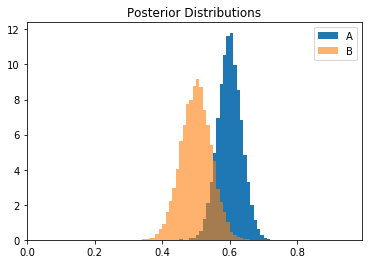

We can be 95.99% sure that A is better than B


In [11]:
plot_hist(posterior_sampler_a, posterior_sampler_b)

----------------------

In [12]:
# Lets call the two soccer players as A and B
# A has converted 53 out of 103 chances (52%) -- Aguero   in 16/17 EPL
# B has converted 38 out of 69 chances (55%)  -- Coutinho in 16/17 EPL
conv_a, n_chances_a = 53, 103
conv_b, n_chances_b = 38, 69

In [13]:
# Prior beliefs that both players are uniform

prior_sampler_a = prior_sampler_uniform()
posterior_sampler_a = posterior_sampler(
    data=conv_a, 
    prior_sampler=prior_sampler_a,
    simulate=lambda p: simulate_conversion(p, n_chances_a)
)

prior_sampler_b = prior_sampler_uniform()
posterior_sampler_b = posterior_sampler(
    data=conv_b, 
    prior_sampler=prior_sampler_b,
    simulate=lambda p: simulate_conversion(p, n_chances_b)
)

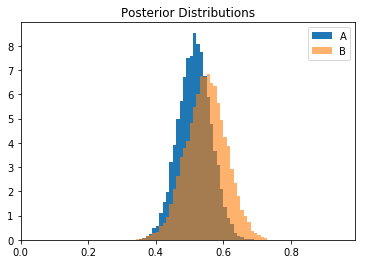

We can be 33.14% sure that A is better than B


In [14]:
plot_hist(posterior_sampler_a, posterior_sampler_b)

To Do:  
Use PyMC package